In [1]:
# In PCA analysis, high dimesional data set can be reduced to lower dimension and keep the variance explained
# In porfolio analysis, PCA may also be applicable
 # covariance matrix > diagonalizable > eigen decomposition > Q*V*Q' where Q consists of eigen vectors as its column
 # the eigen values are variances of stocks after data transformation
 # If sum the first n largest variance =0.9, it means 90% of variance can be explained by that n eigen vectors
    
 # find eigen vectors that explain more than threshold% of variation
def eigen_weight(cov,threshold):
    E_Val, E_Vec = np.linalg.eigh(cov)   # E_Val: variance after transformation
    
    start=0
    for i in range(len(E_Val)):
        start += E_Val[-i-1]/sum(E_Val)
        if start >= threshold:
            w = E_Vec[:,-i-1:]/sum(E_Vec[:,-i-1:])  # last column corresponding to largest eigen value
                                                    # divide by sum of vector to get weight
            return np.flip(w,axis=1)     # flip to make first column correspond to largest eigen value
            break

# basic setting            
portfolio = ['WMT','AMZN','T','V','TSLA','MSFT','UNH','JPM','CAT','PG'] 

px = get_price(portfolio,5)
returns, cov, corr = hist_return_cov_corr(px)

rf=0.01
eigen_w = eigen_weight(cov,0.9)
min_var_w_LM = min_var_weight_LM(cov)
min_var_w_no_ss = min_var_weight_no_ss(cov)
max_sharpe_w_no_ss = max_sharpe_weight_no_ss(cov, returns, rf)

# display all optimal weights in a dataframe
weight_table = pd.DataFrame(data= min_var_w_LM, columns = ['min_var_weight_LM'], index = portfolio)
weight_table['min_var_weight_no_ss'] = min_var_w_no_ss
weight_table['max_sharpe_weight_no_ss'] = max_sharpe_w_no_ss

for i in range(np.size(eigen_w,1) ):
    weight_table['eigen_' + str(i+1)] = eigen_w[:,i]
    
weight_table


[*********************100%***********************]  10 of 10 completed


,min_var_weight_LM,min_var_weight_no_ss,max_sharpe_weight_no_ss,eigen_1,eigen_2,eigen_3,eigen_4,eigen_5,eigen_6,eigen_7
WMT,0.144397,1.425435e-01,9.064755e-02,0.049173,0.097067,0.395180,0.697975,1.749507,4.244676,-2.523824
AMZN,0.028280,1.329618e-02,1.819228e-01,0.136107,0.241695,-1.294157,-0.170263,0.470349,8.918485,0.205411
T,0.219938,2.224553e-01,1.167679e-01,0.042931,0.116780,0.467021,0.290159,1.030249,5.532060,3.563752
V,0.099231,8.068301e-02,8.845292e-02,0.096138,0.174887,-0.166694,0.090902,0.033935,-9.973575,-0.150028
TSLA,0.003654,3.470563e-03,2.310706e-18,0.258284,-0.558620,0.100138,0.001940,-0.058466,0.232752,0.082494
MSFT,-0.052083,0.000000e+00,8.249074e-04,0.113700,0.225880,-0.354019,0.061751,0.146644,-9.862276,-0.142531
UNH,0.110203,1.065090e-01,1.789037e-01,0.071353,0.170465,0.194175,0.559821,-2.974989,5.464292,-0.330754
JPM,0.077589,7.055790e-02,1.009349e-01,0.084650,0.191567,0.547838,-0.094093,-0.560674,-5.105860,0.932561
CAT,-0.000505,7.860466e-19,0.000000e+00,0.108485,0.250950,0.913883,-0.788926,0.217033,4.928742,-1.124122
PG,0.369296,3.604845e-01,2.415454e-01,0.039180,0.089329,0.196636,0.350734,0.946411,-3.379297,0.487041


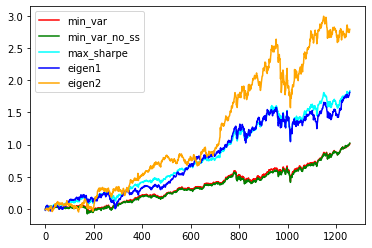

In [3]:
cum_r = cum_returns(px)
min_var_w_LM_r = portfolio_return(min_var_w_LM,cum_r)
min_var_w_no_ss_r = portfolio_return(min_var_w_no_ss,cum_r)
max_sharpe_w_no_ss_r = portfolio_return(max_sharpe_w_no_ss,cum_r)
eigen_w_1_r = portfolio_return(eigen_w[:,0],cum_r)
eigen_w_2_r = portfolio_return(eigen_w[:,1],cum_r)

plt.plot(min_var_w_LM_r, color='red', label="min_var")
plt.plot(min_var_w_no_ss_r, color='green', label="min_var_no_ss")
plt.plot(max_sharpe_w_no_ss_r, color='cyan', label="max_sharpe")
plt.plot(eigen_w_1_r, color='blue', label="eigen1")
plt.plot(eigen_w_2_r, color='orange', label="eigen2")
plt.legend(loc="upper left")